# CSE 5243 - Introduction to Data Mining
## Homework 2: Classification
- Semester: Autumn 2020
- Instructor: Tom Bihari
- Section: Tuesday/Thursday 9:35AM
- Student Name: Krescens Kok
- Student Email: kok.24@osu.edu
- Student ID: 500278517

***

***
# Section: Overview
- Insert a short description of the scope of this exercise, any supporting information, etc.
***

The scope of this exercise is to evauluate classifiers based on business criteria, understand how to tune and evaluate a classifier to achieve good performance, and to understand how to select and evaluate suitable off the shelf classifiers based on the characteristics of a dataset and the outcomes needed. This assignment will include modeling with training data and confirming the model with testing data.

***
# Section: Setup
***

Dataset is obtained from "https://healthpolicy.ucla.edu/chis/data/public-use-data-file/Pages/2003.aspx![image.png](attachment:image.png)"

In [66]:
#import needed packages/libraries
import pandas as pd
import seaborn as sns
import numpy as np
df = pd.read_excel(r'/Users/krescenskok/Documents/Semester5/CSE 5243/Homeworks/Homework2/AdultData.xls', header= 2)
df

RecID Train Class  Health  Spouse  Education  Income  Home Type  \
0          1     y     c       1       1          4   50000          1   
1          2     y     d       2      -1          4   13200          3   
2          3     y     n       2       1          3   12000          1   
3          4     y     c       1      -1          1    8000          1   
4          5     y     d       1       1          7   65000          1   
...      ...   ...   ...     ...     ...        ...     ...        ...   
42039  42040     n     d       1       1          7  130000          1   
42040  42041     n     n       2       1          3   70000          3   
42041  42042     n     n       3      -1          3   20000          3   
42042  42043     n     d       3      -1          3   27000          1   
42043  42044     n     n       3      -1          3   22000          3   

       Number of Rooms  Own or Rent  ...  Race  Occupation  Age  Gender  \
0                    6            1  ...     5          -1   35       2   
1                    3            2  ...     5          -1   81       2   
2                    3            2  ...     2          -1   22       2   
3                    6            2  ...     2          -1   62       1   
4                    5            1  ...     7          -1   41       1   
...                ...          ...  ...   ...         ...  ...     ...   
42039                7            1  ...     3          99   40       2   
42040                6            1  ...     4           3   47       2   
42041                1            2  ...     4          -1   22       2   
42042                5            2  ...     4          -1   27       2   
42043                1            2  ...     4          -1   24       2   

       House Tenure  Months at Current Address  Weight  Walking  \
0                 1                         48     220        1   
1                 2                         60     140        1   
2                 2                         36     120        2   
3                 2                        144     175        2   
4                 1                        144     180        1   
...             ...                        ...     ...      ...   
42039             1                        120     100        2   
42040             1                        192     110        2   
42041             2                         12     160        2   
42042             2                         24     140        1   
42043             2                         24     125        2   

       Employment Status  Years in USA  
0                      5            -1  
1                      5            -1  
2                      5            -1  
3                      5            -1  
4                      5            -1  
...                  ...           ...  
42039                  1             5  
42040                  1            -1  
42041                  4            -1  
42042                  4            -1  
42043                  4            -1  

[42044 rows x 28 columns]

***
# Section: 1 - Evaluation mMethod
- Define measures for evaluating the classification models you develop.  Explain why the measures you choose provide a useful view into the value and usefulness of the model you eventually chose for the company to use.  Define two types:
***

***
## Section: 1.1 - Define measures that do not include the cost information
- (e.g., confusion matrices, accuracy, precision, recall, F-measures, etc.).
***

Confusion Matrices: These matricies reveal how well the model is predicting the data. It does this by showing the types of errors that occur: false positive/false negative. The false positive occurs when the actual class is no and the predicted class is yes, while the false negative occurs when the actual class is no and the actual class is yes. It also shows the correct number of predicted values, where the predicted class and actual class are both yes's and the predicted class and actual class are both no's. With these values, we want the true positive and true negative values to be high and the false positive and false negative values to be low, to ensure that the model is useful.

Accuracy: The accuracy is calculated by adding the true positive and true negative values, and dividing by the total sum from all 4 categories. This shows us how accurate the model is predicting the data.

Precision: The precision is calculated by taking the true positive values and dividing it by the total predicted positive values. This shows us the positive predicted value because it's focusing on the predicted values.

Recall: The recall is calculated by taking the true positive values and dividing it by the total actual positive values. This shows the true positive rate because it's focusing on the actual values.

F-measure: This value calculates the harmonic mean of the precision and recall values by weighting those values equally. The best value is 1 while the worse is 0.

***
## Section: 1.2 - Define measures that do include the cost information
- (e.g., using cost matrices).
***

Cost Matrices: These matrices help us see how much a wrong prediction or right prediction can cost us. It allows us to calculate whether a type 1 error (false positive) or type 2 error (false negative) is worse.

***
# Section: 2 - Pre-Processing of the Dataset
- Use the Adult dataset.  Split it into a Training dataset and a Test dataset based on the Train attribute (see the README worksheet in the data file).  Keep them separate and use the Training dataset for training/tuning and the Test dataset for testing.
***

***
## Section: 2.1 - Explore the attributes
- As in Homework 1, explore the attributes briefly. Reference the provided Data Dictionary (CHIS 2003 PUF Data Dictionary-Adult May2010.pdf).
- Provide basic statistics for the attributes.
- List which attributes are Nominal (even though they are encoded as numbers), Ordinal, Interval, Ratio.
***

Since most of the data are categorical variables represented with numbers (in categories), the summary statistics doesn't tell us much. However, it does show us that since the count values are the same the variables in the training data and test data (separately), there are no missing values. The two tables below display the variables that had meaningful summaries for the training dataset and test dataset. The training dataset has roughly double data rows than the test dataset. This is good due to the fact that we are using the training dataset to build a model, so having more data will allow the model to be more accurate. Overall, the summary statistics for both datasets are very similar, however, there are a couple values that differ by quite a bit (mean/std of income, mean/std of monthly rent, max number of rooms).

In [67]:
#splitting the dataset based on the attribute "Train"
Train_df = df[df["Train"] == 'y']
Test_df = df[df["Train"] == "n"]

#print out a table with the summary statistics for each quantitative variable in the training dataset
Train_df_summary = Train_df[['Income', 'Number of Rooms', 'Monthly Rent', 'Monthly Mortgage', 'Height', 'Age', 'Months at Current Address', 'Weight', 'Years in USA']]
Train_df_summary.describe().T

count          mean           std   min      25%  \
Income                     28029.0  61342.937458  55673.377618   0.0  23000.0   
Number of Rooms            28029.0      5.025295      2.346189   1.0      3.0   
Monthly Rent               28029.0    269.525598    449.472162  -1.0     -1.0   
Monthly Mortgage           28029.0    600.271362    835.831072  -1.0     -1.0   
Height                     28029.0     66.319669      4.282824  42.0     63.0   
Age                        28029.0     48.903421     17.341730  18.0     36.0   
Months at Current Address  28029.0    128.687360    139.231264   1.0     24.0   
Weight                     28029.0    165.980770     39.540334  53.0    137.0   
Years in USA               28029.0      0.282457      2.325782  -1.0     -1.0   

                               50%      75%       max  
Income                     45000.0  80000.0  300000.0  
Number of Rooms                5.0      6.0      90.0  
Monthly Rent                  -1.0    500.0    2000.0  
Monthly Mortgage               0.0   1100.0    4000.0  
Height                        66.0     69.0      77.0  
Age                           48.0     61.0      85.0  
Months at Current Address     72.0    180.0    1020.0  
Weight                       160.0    190.0     330.0  
Years in USA                  -1.0     -1.0       5.0

In [68]:
#print out a table with the summary statistics for each quantitative variable in the test dataset
Test_df_summary = Test_df[['Income', 'Number of Rooms', 'Monthly Rent', 'Monthly Mortgage', 'Height', 'Age', 'Months at Current Address', 'Weight', 'Years in USA']]
Test_df_summary.describe().T

count          mean           std   min      25%  \
Income                     14015.0  61149.327934  54762.319734   0.0  23000.0   
Number of Rooms            14015.0      4.925437      2.326176   1.0      3.0   
Monthly Rent               14015.0    314.317802    482.468591  -1.0     -1.0   
Monthly Mortgage           14015.0    591.789868    840.366584  -1.0     -1.0   
Height                     14015.0     66.219336      4.322039  42.0     63.0   
Age                        14015.0     48.588013     17.219951  18.0     35.0   
Months at Current Address  14015.0    128.737781    140.061366   1.0     24.0   
Weight                     14015.0    165.638031     39.893767  50.0    136.0   
Years in USA               14015.0      0.342490      2.346562  -1.0     -1.0   

                               50%      75%       max  
Income                     45000.0  80000.0  300000.0  
Number of Rooms                5.0      6.0      65.0  
Monthly Rent                  -1.0    600.0    2000.0  
Monthly Mortgage               0.0   1100.0    4000.0  
Height                        66.0     69.0      77.0  
Age                           47.0     61.0      85.0  
Months at Current Address     72.0    180.0    1056.0  
Weight                       160.0    188.5     330.0  
Years in USA                  -1.0      2.0       5.0

It would be more beneficial to find the counts of each category within the variables, for specific variables:
This helps gain insight on finding the maximum and minimum counts for the categories, as well as finding out which category applies to most of the sample the data was obtained from.

| Attribute 	| Counts 	|
|-	|-	|
| Health 	| 2    8767<br>3    7571<br>1    6249<br>4    4002<br>5    1440 	|
| Spouse 	| 1     14253<br>-1    13421<br>2       355 	|
| Education 	| 3     6830<br>7     5632<br>4     4663<br>9     2659<br>6     2508<br>2     1716<br>1     1654<br>10     922<br>5      876<br>8      402<br>91     167 	|
| Home Type 	| 1    19352<br>3     6002<br>4     1358<br>2     1317 	|
| Own or Rent 	| 1    18146<br>2     9017<br>3      866 	|
| Citizenship 	| 1    21218<br>2     3512<br>3     3299 	|
| Country of Birth 	| 1    21218<br>2     2703<br>5     2125<br>6      852<br>3      546<br>7      335<br>4      250 	|
| Working Status 	| 1     14873<br>4      9879<br>2      1867<br>3      1306<br>-2      104 	|
| Family Type 	| 1    11200<br>2     7610<br>3     7111<br>4     2108 	|
| Marital Status 	| 1    14608<br>2     8513<br>3     4908 	|
| Race 	| 5    19466<br>6     3261<br>3     2289<br>4     1407<br>7      922<br>2      599<br>1       85 	|
| Occupation 	| -1     11280<br> 2      4558<br> 1      2435<br> 5      2407<br> 3      2305<br> 4      1670<br> 9       808<br> 7       785<br> 10      724<br> 8       448<br> 99      344<br> 6       237<br> 11       28 	|
| Gender 	| 2    16343<br>1    11686 	|
| House Tenure 	| 1    18177<br>2     8991<br>3      861 	|
| Walking 	| 1     20248<br>2      7459<br>-1      322 	|
| Employment Status 	|  1    14510<br> 5    10136<br> 2     1797<br> 4     1306<br> 3      176<br>-2      104 	|

Data Types:


| Attribute Name | Data Type |
|-|-|
| RecID | Discrete, Nominal |
| Train | Discrete, Nominal |
| Class | Discrete, Nominal |
| Health | Discrete, Ordinal |
| Spouse | Discrete, Nominal |
| Education | Discrete, Ordinal |
| Income | Discrete, Ratio |
| Home Type | Discrete, Nominal |
| Number of Rooms | Discrete, Ratio |
| Own or Rent | Discrete, Nominal |
| Monthly Rent | Discrete, Ratio |
| Monthly Mortgage | Discrete, Ratio |
| Citizenship | Discrete, Nominal |
| Country of Birth | Discrete, Nominal |
| Working Status | Discrete, Nominal |
| Family Type | Discrete, Nominal |
| Height | Discrete, Ratio |
| Marital Status | Discrete, Nominal |
| Race | Discrete, Nominal |
| Occupation | Discrete, Nominal |
| Age | Discrete, Ratio |
| Gender | Discrete, Nominal |
| House Tenure | Discrete, Nominal |
| Months at Current Address | Discrete, Ratio |
| Weight | Discrete, Ratio |
| Walking | Discrete, Nominal |
| Employment Status | Discrete, Nominal |
| Years in USA | Discrete, Ordinal |

***
## Section: 2.2 - Revise the dataset
- Review the meanings of the attributes and consider removing redundant or (likely) irrelevant attributes, combining attributes, etc., to reduce the number of attributes.
- (You may choose to use techniques such as those you used in Homework 1 to analyze the impacts of individual attributes on the CLASS attribute, but you need not do a “deep” analysis.)
- Describe what you chose to do (and not do), and why.
***

| Attribute 	| Meaning 	|
|-	|-	|
| RecID 	| Row number in the dataset 	|
| Train 	| Whether it is included in the training dataset 	|
| Class 	| Class attribute, dealing with pets in the house 	|
| Health 	| General health condition 	|
| Spouse 	| Spouse living in the same household 	|
| Education 	| Educational attainment 	|
| Income 	| Household total annual income 	|
| Home Type 	| Type of house 	|
| Number of Rooms 	| Number of rooms in home 	|
| Own or Rent 	| Own or rent home 	|
| Monthly Rent 	| Monthly rent/space payment 	|
| Monthly Mortgage 	| Monthly mortgage payment 	|
| Citizenship 	| Citizenship status 	|
| Country of Birth 	| Country born in 	|
| Working Status 	| Working status 	|
| Family Type 	| Family type 	|
| Height 	| Height in inches 	|
| Marital Status 	| Marital status 	|
| Race 	| Race census 2000 definition 	|
| Occupation 	| Main occupation 	|
| Age 	| Age 	|
| Gender 	| Gender 	|
| House Tenure 	| Self reported house tenure 	|
| Months at Current Address 	| Number of months lived at current address 	|
| Weight 	| Weight in pounds 	|
| Walking 	| Any walking for transport or fun/exercise 	|
| Employment Status 	| Employment status 	|
| Years in USA 	| Years lived in the US 	|

- House Tenure should be dropped because own or rent answers the same question. Also, having a property seems irrelevant to predicting whether or not that individual has a pet.
- It is unlike that the weight and height will be useful in predicting whether or not an inidividual has a pet, so these variables should be removed.
- "Employment Status" should be removed because Working Status and Employment Status are essentially recording the same data.
- "Spouse" can also be removed because "Spouse" asks whether or not they live in the same house, and the category, 2, for "Marital Status" has the same question.
- "Monthly Mortgage" and "Monthly Rent" should be combined because they are both payments towards properties that the individuals must make.

In [69]:
#Combined the two attributes together
df['Monthly Payment'] = df['Monthly Rent'] + df['Monthly Mortgage']
#Created a new dataframe with the new attribute
df2 = df[['RecID', 'Train', 'Class', 'Health', 'Income', 'Home Type', 'Number of Rooms', 'Own or Rent', 'Monthly Payment', 'Citizenship', 'Country of Birth', 'Working Status', 'Family Type', 'Marital Status', 'Race', 'Occupation', 'Age', 'Gender', 'Months at Current Address', 'Walking', 'Years in USA', 'Education', 'Spouse']]
#Split the dataset again
Train_df = df2[df2["Train"] == 'y']
Test_df = df2[df2["Train"] == "n"]


Provided below is a table focusing on the means of each attribute (that was not a categorical variable), categorized with the "Class" variable. I chose to provide bar graphs based on the non-categorical variables to see if there was a trend between the class variable and those specific variables. I didn't graph the number of rooms, height, age, months at current address, weight, or years in USA because I did not think that they would be helpful in visualizing the relationship with the class variable. The numbers in those specific variables were too close between the different class categories. I did not choose to provide visualizations for the other variables because it would not be helpful to graph 2 categorical variables. 

In [70]:
#Get only the quantitative variables
Train_df_qual = Train_df[['Income', 'Number of Rooms', 'Monthly Payment', 'Age', 'Months at Current Address', 'Years in USA', 'Class']]
#Get the means after grouping by the class attribute
a = Train_df_qual.groupby(['Class']).mean()
a

Income  Number of Rooms  Monthly Payment        Age  \
Class                                                              
b      70718.442294         5.824119       954.765722  47.587768   
c      66475.390038         5.285371       908.923244  48.891963   
d      74562.444526         5.704750       964.074638  49.172749   
n      53578.596612         4.568144       810.373760  49.057130   

       Months at Current Address  Years in USA  
Class                                           
b                     130.022460     -0.625432  
c                     129.416025     -0.380654  
d                     136.983129     -0.179718  
n                     125.329834      0.791511

This graph is interesting because it shows the different means among the classes. It gives us insight on the average income individuals make, showing us that homes with dogs have the highest average income, and homes with no animals have the lowest average income. This makes sense because if the income is not high enough, people can't afford to provide and care for an animal.

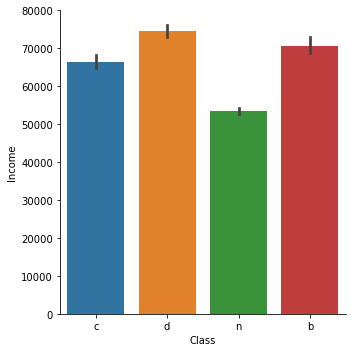

In [71]:
sns.catplot(x="Class", y="Income", kind="bar", data=Train_df_qual)

This graph is interesting to look at because the mean for monthly payments (for properties) for individuals with no pets is the lowest, while the mean for monthly payments (for properties) for individuals with dogs is the highest.

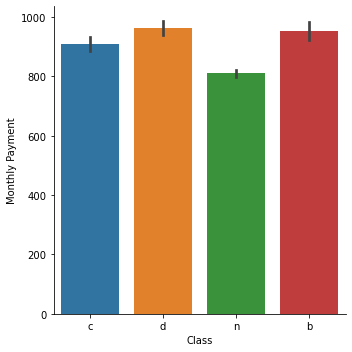

In [72]:
sns.catplot(x="Class", y="Monthly Payment", kind="bar", data=Train_df)

With this graph, it's evident that the longer an individual is at their home, then they have a pet. The category of the individual having neither pets has the lowest mean for months at current address.

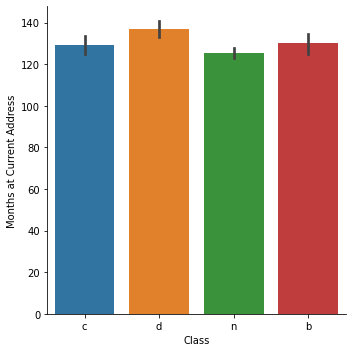

In [73]:
sns.catplot(x="Class", y="Months at Current Address", kind="bar", data=Train_df)

It's interesting to see that the lowest mean for the number of rooms have no pets, and the highest mean has both cats and dogs. Possibly because individuals don't have enough room in their homes for a pet.

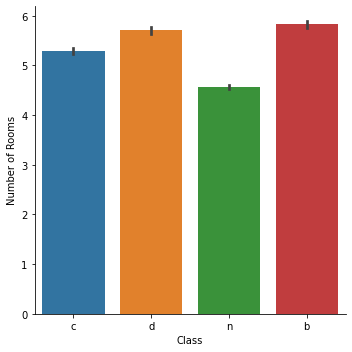

In [74]:
sns.catplot(x="Class", y="Number of Rooms", kind="bar", data=Train_df)

***
## Section: 2.3 - Transform the attributes
- Consider transforming the remaining attributes (e.g., using the data dictionary to replace the numbers with text values for some attributes – this might or might not be useful), normalizing / scaling values, encoding labels (if necessary), etc.
- Describe what you chose to do (and not do), and why.
***

In [75]:
#Normalizing the entire dataset
qual_var = df2[['Income', 'Number of Rooms', 'Monthly Payment', 'Age', 'Months at Current Address']]
normalized = (qual_var - qual_var.mean()) / qual_var.std()
normalized.fillna(0, inplace=True)
df2
#Adding the remaining attributes to the normalized dataframe
normalized['Class'] = df2['Class']
normalized['Home Type'] = df2['Home Type']
normalized['Health'] = df2['Health']
normalized['Own or Rent'] = df2['Own or Rent']
normalized['Citizenship'] = df2['Citizenship']
normalized['Country of Birth'] = df2['Country of Birth']
normalized['Working Status'] = df2['Working Status']
normalized['Family Type'] = df2['Family Type']
normalized['Marital Status'] = df2['Marital Status']
normalized['Race'] = df2['Race']
normalized['Occupation'] = df2['Occupation']
normalized['Gender'] = df2['Gender']
normalized['Walking'] = df2['Walking']
normalized['Years in USA'] = df2['Years in USA']
normalized['Train'] = df2['Train']
normalized['Class'] = df2['Class']
normalized['Education'] = df2['Education']

#split dataset again
Train_df = normalized[normalized["Train"] == 'y']
Test_df = normalized[normalized["Train"] == "n"]
Train_df

Income  Number of Rooms  Monthly Payment       Age  \
0     -0.203689         0.430769        -0.372644 -0.797512   
1     -0.868299        -0.851292        -0.939052  1.861192   
2     -0.889971        -0.851292        -0.701951 -1.548885   
3     -0.962212         0.430769        -0.767812  0.763032   
4      0.067212         0.003415         0.417691 -0.450724   
...         ...              ...              ...       ...   
28024  0.247813        -0.423938         0.417691 -0.219533   
28025 -0.023088         0.858122        -0.471436  0.589638   
28026 -0.564890         0.003415        -0.636090  0.011659   
28027 -0.474590         0.430769         0.345244  1.398809   
28028  0.338113        -1.278645         0.417691 -0.913108   

       Months at Current Address Class  Home Type  Health  Own or Rent  \
0                      -0.578496     c          1       1            1   
1                      -0.492479     d          3       2            2   
2                      -0.664513     n          1       2            2   
3                       0.109642     c          1       1            2   
4                       0.109642     d          1       1            1   
...                          ...   ...        ...     ...          ...   
28024                  -0.234427     d          1       2            1   
28025                   1.829988     n          1       4            1   
28026                  -0.578496     d          2       3            2   
28027                   0.109642     c          1       2            1   
28028                  -0.320444     d          1       1            1   

       Citizenship  ...  Working Status  Family Type  Marital Status  Race  \
0                1  ...               4            3               1     5   
1                1  ...               4            1               2     5   
2                1  ...               4            3               1     2   
3                1  ...               4            1               2     2   
4                1  ...               4            3               1     7   
...            ...  ...             ...          ...             ...   ...   
28024            2  ...               1            2               1     6   
28025            1  ...               4            1               2     5   
28026            1  ...               1            1               2     5   
28027            2  ...               4            1               2     5   
28028            2  ...               4            3               1     6   

       Occupation  Gender  Walking  Years in USA  Train Education  
0              -1       2        1            -1      y         4  
1              -1       2        1            -1      y         4  
2              -1       2        2            -1      y         3  
3              -1       1        2            -1      y         1  
4              -1       1        1            -1      y         7  
...           ...     ...      ...           ...    ...       ...  
28024           2       1        1             5      y         4  
28025          -1       1        2            -1      y         5  
28026           4       2        2            -1      y         3  
28027          -1       2        1             5      y         2  
28028          -1       2        1             5      y         3  

[28029 rows x 21 columns]

In [76]:
Test_df

Income  Number of Rooms  Monthly Payment       Age  \
28029 -0.203689        -0.423938         0.154246 -0.797512   
28030 -0.293989         0.003415         1.076305 -1.202097   
28031 -1.106692        -1.278645        -0.438506 -0.624118   
28032  2.144120         0.858122         0.156881 -0.970906   
28033 -0.691311        -0.423938        -1.164298  2.092383   
...         ...              ...              ...       ...   
42039  1.241117         0.858122         1.208027 -0.508522   
42040  0.157513         0.430769         0.417691 -0.103937   
42041 -0.745491        -1.705999        -0.076269 -1.548885   
42042 -0.619070         0.003415         0.746998 -1.259895   
42043 -0.709371        -1.705999        -0.168474 -1.433289   

       Months at Current Address Class  Home Type  Health  Own or Rent  \
28029                  -0.492479     n          1       1            1   
28030                  -0.664513     n          1       3            1   
28031                  -0.843716     n          3       4            2   
28032                  -0.664513     n          1       1            1   
28033                   0.797780     d          1       2            3   
...                          ...   ...        ...     ...          ...   
42039                  -0.062392     d          1       1            1   
42040                   0.453711     n          3       2            1   
42041                  -0.836548     n          3       3            2   
42042                  -0.750531     d          1       3            2   
42043                  -0.750531     n          3       3            2   

       Citizenship  ...  Working Status  Family Type  Marital Status  Race  \
28029            2  ...               4            3               1     3   
28030            2  ...               1            2               1     5   
28031            3  ...               1            4               1     6   
28032            1  ...               2            3               1     5   
28033            1  ...               4            1               2     5   
...            ...  ...             ...          ...             ...   ...   
42039            2  ...               1            2               1     3   
42040            1  ...               1            2               1     4   
42041            1  ...               3            4               3     4   
42042            1  ...               3            1               2     4   
42043            1  ...               3            4               3     4   

       Occupation  Gender  Walking  Years in USA  Train Education  
28029          -1       2        1             4      n         7  
28030           2       2        1             5      n         7  
28031          10       2        2             5      n         1  
28032           3       1        1            -1      n         7  
28033          -1       2        2            -1      n         3  
...           ...     ...      ...           ...    ...       ...  
42039          99       2        2             5      n         7  
42040           3       2        2            -1      n         3  
42041          -1       2        2            -1      n         3  
42042          -1       2        1            -1      n         3  
42043          -1       2        2            -1      n         3  

[14015 rows x 21 columns]

***
# Section: 3 - Evaluation of the Off-The-Shelf KNN Classifier
- Select the KNN classifier from the SciKit Learn library and run it on the dataset.
***

***
## Section: 3.1 - Configure the off-the-shelf KNN classifier
- Use the KNeighborsClassifier from the SciKit Learn library
- Explain all setup, parameters and execution options you chose to set, and why.
***

Setting up:
- Used the KNeighborsClassifier function
- Set up the predictor variables from the training data and the test variable from the test data. The predictor variables were used from the cleaned/refreshed dataset after dropping unnecessary variables and combining certain variables. The "Class" variable from the test data is only used because that is what we are trying to predict.
- The k value for this prediction is set at 5 because usually values of k are either 5 or 10

In [77]:
#code taken from https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsClassifier
#Separate the predictor variables
pred_col = ['Health', 'Income', 'Home Type', 'Number of Rooms', 'Own or Rent', 'Monthly Payment', 'Citizenship', 'Country of Birth', 'Working Status', 'Family Type', 'Marital Status', 'Race', 'Occupation', 'Age', 'Gender', 'Months at Current Address', 'Walking', 'Years in USA', 'Education']
#Get only the class variable
class_col = ['Class']
#specify the k value
knn5 = KNeighborsClassifier(n_neighbors = 5)
#fit the model
knn5.fit(Train_df[pred_col], Train_df[class_col].values.ravel())

KNeighborsClassifier()

The output below shows the values that can be calculated by the confusion matrix. With a k value of 5, using 19 parameters, the prediction is accurate only 50% of the time. The precision and recall is pretty good for the class of having no pets, and the worst for having both pets.

In [78]:
#code used from https://www.educative.io/edpresso/how-to-create-a-confusion-matrix-in-python-using-scikit-learn
from sklearn.metrics import confusion_matrix
from sklearn import metrics
#predict the classifier variable
predictions = knn5.predict(Test_df[pred_col])
#create a confusion matrix
conf_matrix = metrics.confusion_matrix(Test_df[class_col], predictions, labels = ['b', 'c', 'd', 'n'])
#print the calculated values from the confusion matrix
print(metrics.classification_report(Test_df[class_col], predictions))

              precision    recall  f1-score   support

           b       0.15      0.15      0.15      1299
           c       0.20      0.18      0.19      2095
           d       0.24      0.23      0.24      2425
           n       0.68      0.71      0.70      8196

    accuracy                           0.50     14015
   macro avg       0.32      0.32      0.32     14015
weighted avg       0.49      0.50      0.49     14015



Below is the output for the cost matrix and the total cost using this model as a predictor. The cost matrix was created by having the diagonals as each class profit (dog, cat, both, neither). The last column represents the class of having no pets, it is all 0's because if it is predicted that there are no pets, then the company won't call the individual. The remaining of the columns are 10's because the cost of a call is $10. $37,329.50 is pretty high, so I will continue testing different models to provide a lower cost.

In [79]:
#Code used from https://www.programcreek.com/python/example/87183/sklearn.metrics.confusion_matrix
#Calculate the cost of each classifier category
dog_cost = -1*(100*.15-10)
cat_cost = -1*(80*.15-10)
both_cost = -1*(150*.15-10)
neither_cost = 0
call_cost = 10
#Create the cost matrix
cost_matrix = np.array([[both_cost, call_cost, call_cost, neither_cost], 
    [call_cost, cat_cost, call_cost, neither_cost], 
    [call_cost, call_cost, dog_cost, neither_cost],
    [call_cost, call_cost, call_cost, neither_cost]])
print(cost_matrix)
#Find the total cost by multiplying the respective ij vector value with the cost matrix and the confusion matrix
print("The total cost is %.2f"%(metrics.confusion_matrix(Test_df[class_col], predictions, labels = ['b', 'c', 'd', 'n'])
      * cost_matrix).sum())



[[-12.5  10.   10.    0. ]
 [ 10.   -2.   10.    0. ]
 [ 10.   10.   -5.    0. ]
 [ 10.   10.   10.    0. ]]
The total cost is 37329.50


***
## Section: 3.2 - Run and evaluate the classifier
- Try several values of the K parameter and compare the results.
- Evaluate the performance of the classifier, using the evaluation method you defined above.
***

Here, the only thing that changes it the k value equalling to 20

In [80]:
#code taken from https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsClassifier
pred_col = ['Health', 'Income', 'Home Type', 'Number of Rooms', 'Own or Rent', 'Monthly Payment', 'Citizenship', 'Country of Birth', 'Working Status', 'Family Type', 'Marital Status', 'Race', 'Occupation', 'Age', 'Gender', 'Months at Current Address', 'Walking', 'Years in USA', 'Education']
class_col = ['Class']
#Changing the k value
knn5 = KNeighborsClassifier(n_neighbors = 20)
knn5.fit(Train_df[pred_col], Train_df[class_col].values.ravel())

KNeighborsClassifier(n_neighbors=20)

The accuracy increases by .06 compared to the previous model, while the f1-score increases only for the class of owning no pets.

In [81]:
#code used from https://www.educative.io/edpresso/how-to-create-a-confusion-matrix-in-python-using-scikit-learn
from sklearn.metrics import confusion_matrix
from sklearn import metrics
predictions = knn5.predict(Test_df[pred_col])
conf_matrix = metrics.confusion_matrix(Test_df[class_col], predictions, labels = ['b', 'c', 'd', 'n'])
print(metrics.classification_report(Test_df[class_col], predictions))

              precision    recall  f1-score   support

           b       0.16      0.07      0.10      1299
           c       0.21      0.06      0.10      2095
           d       0.27      0.19      0.23      2425
           n       0.64      0.87      0.74      8196

    accuracy                           0.56     14015
   macro avg       0.32      0.30      0.29     14015
weighted avg       0.47      0.56      0.50     14015



The cost decreases significantly after increasing the k value.

In [82]:
#Code used from https://www.programcreek.com/python/example/87183/sklearn.metrics.confusion_matrix
dog_cost = -1*(100*.15-10)
cat_cost = -1*(80*.15-10)
both_cost = -1*(150*.15-10)
neither_cost = 0
call_cost = 10
cost_matrix = np.array([[both_cost, call_cost, call_cost, neither_cost], 
    [call_cost, cat_cost, call_cost, neither_cost], 
    [call_cost, call_cost, dog_cost, neither_cost],
    [call_cost, call_cost, call_cost, neither_cost]])
print(cost_matrix)
print("The total cost is %.2f"%(metrics.confusion_matrix(Test_df[class_col], predictions, labels = ['b', 'c', 'd', 'n'])
      * cost_matrix).sum())



[[-12.5  10.   10.    0. ]
 [ 10.   -2.   10.    0. ]
 [ 10.   10.   -5.    0. ]
 [ 10.   10.   10.    0. ]]
The total cost is 18469.50


***
## Section: 3.3 - Evaluate the choice of the KNN classifier
- What characteristics of the problem and data made KNN a good or bad choice?
***

Some characteristics of the problem and the data are that makes KNN a bad choice is that there are so many parameters prediciting the class variable. As the number of parameters increase (dimensions increase) the curse of dimensionality occurs where the data points seem very far and the feature space becomes less dense and emptier. This decreases the accuracy of the predictions.

Since the KNN classifier is heavily dependent on distance, the original dataset would make KNN a good choice, however, after normalizing the data, it allows the KNN classifier to become useful. Another quality that makes KNN a good choice is the fact that the problem is asking us to predict a classifier variable, which is what the KNN method is used for. The dataset uses 1/3 for test data and the other 2/3 for training data. This is a good split because there are more training data, which helps increase the prediction. However, 30%/70% for test/train respectively could potentially make the predictions better.

***
# Section: 4 - Evaluation of Off-The-Shelf Classifier #2
- As with the KNN classifier above, choose another classifier from the SciKit Learn library (Decision Tree, SVM, Logistic Regression, etc.) and run it on the dataset.
***

***
## Section: 4.1 - Configure the classifier
- Use the appropriate classifier from the SciKit Learn library.
- Explain all setup, parameters and execution options you chose to set, and why.
***

Setting up:
- Used the DecisionTreeClassifier function
- Set up the predictor variables from the training data and the test variable from the test data. The predictor variables were used from the cleaned/refreshed dataset after dropping unnecessary variables and combining certain variables. The "Class" variable from the test data is only used because that is what we are trying to predict.
- Parameters were used in the second run of the tree classifier. Criterion and max_depth were used; Criterion was used to focus on the information gain to measure the quality of the split and max_depth was used to limit the maximum depth of the tree. These both helped increase the accuracy and decrease the total cost.

I chose to use a decision tree for the next classifier. Looking at the outputs below, the accuracy is worse than the KNN classifier. The cost is also signficantly higher.

In [83]:
#Code used from https://www.datacamp.com/community/tutorials/decision-tree-classification-python
from sklearn import tree
#fit the tree model
clf = tree.DecisionTreeClassifier()
clf = clf.fit(Train_df[pred_col], Train_df[class_col])
y_pred1 = clf.predict(Test_df[pred_col])
print(metrics.classification_report(Test_df[class_col], y_pred1))

              precision    recall  f1-score   support

           b       0.18      0.19      0.19      1299
           c       0.19      0.20      0.19      2095
           d       0.22      0.24      0.22      2425
           n       0.68      0.64      0.66      8196

    accuracy                           0.46     14015
   macro avg       0.32      0.32      0.32     14015
weighted avg       0.48      0.46      0.47     14015



In [84]:
conf_matrix = metrics.confusion_matrix(Test_df[class_col], y_pred1, labels = ['b', 'c', 'd', 'n'])
print(conf_matrix)
print("The total cost is %.2f"%(metrics.confusion_matrix(Test_df[class_col], y_pred1, labels = ['b', 'c', 'd', 'n'])
      * cost_matrix).sum())

[[ 245  247  323  484]
 [ 268  427  462  938]
 [ 340  439  571 1075]
 [ 479 1191 1298 5228]]
The total cost is 43698.50


***
## Section: 4.2 - Run and evaluate the classifier
- Try several values of the parameters (if appropriate) and compare the results.
- Evaluate the performance of the classifier, using the evaluation method you defined above.
***

Setting the criterion to "gini" and max_depth to 7, the accuracy increases and the cost decreases by a lot. However, the f scores are closer to zero (except for the neither pets category, which is bad because the predictions aren't precise for the other categories.)

In [85]:
#code used from https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
clf = tree.DecisionTreeClassifier(criterion = "gini", max_depth=7)
clf = clf.fit(Train_df[pred_col], Train_df[class_col])
y_pred2 = clf.predict(Test_df[pred_col])
print(metrics.classification_report(Test_df[class_col], y_pred2))

              precision    recall  f1-score   support

           b       0.07      0.00      0.00      1299
           c       0.14      0.00      0.01      2095
           d       0.25      0.03      0.06      2425
           n       0.59      0.98      0.74      8196

    accuracy                           0.58     14015
   macro avg       0.26      0.25      0.20     14015
weighted avg       0.41      0.58      0.44     14015



In [86]:
conf_matrix = metrics.confusion_matrix(Test_df[class_col], y_pred2, labels = ['b', 'c', 'd', 'n'])
print(conf_matrix)
print("The total cost is %.2f"%(metrics.confusion_matrix(Test_df[class_col], y_pred2, labels = ['b', 'c', 'd', 'n'])
      * cost_matrix).sum())

[[   2    8   42 1247]
 [   5    8   61 2021]
 [   9    5   75 2336]
 [  14   38  117 8027]]
The total cost is 2574.00


By changing the parameter, criterion, to "entropy" the f scores are better than the previous values but still not very good, the accuracy is the same, and the cost has increased.

In [87]:
#code used from https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
#change parameter values of the classifier function
clf = tree.DecisionTreeClassifier(criterion = "entropy", max_depth=7)
clf = clf.fit(Train_df[pred_col], Train_df[class_col])
y_pred3 = clf.predict(Test_df[pred_col])
print(metrics.classification_report(Test_df[class_col], y_pred3))

              precision    recall  f1-score   support

           b       0.16      0.01      0.02      1299
           c       0.11      0.00      0.00      2095
           d       0.30      0.18      0.23      2425
           n       0.62      0.94      0.75      8196

    accuracy                           0.58     14015
   macro avg       0.30      0.28      0.25     14015
weighted avg       0.45      0.58      0.48     14015



In [88]:
conf_matrix = metrics.confusion_matrix(Test_df[class_col], y_pred3, labels = ['b', 'c', 'd', 'n'])
print(conf_matrix)
print("The total cost is %.2f"%(metrics.confusion_matrix(Test_df[class_col], y_pred3, labels = ['b', 'c', 'd', 'n'])
      * cost_matrix).sum())

[[  11    3  258 1027]
 [  12    3  307 1773]
 [  15    6  441 1963]
 [  30   15  453 7698]]
The total cost is 8641.50


After limiting the max_depth, the maximum depth of the decision tree, the accuracy seemed to get worse. However, the f scores are better but the cost is much higher. With decision trees, as the max_depth increases, the accuracy decreases, the f scores increase, and the cost increases. But it becomes a much more reasonable prediction. Looking at the outputs below, the accuracy has decreased by .07 than the previous value and the f scores are better.

In [89]:
#code used from https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
clf = tree.DecisionTreeClassifier(criterion = "gini", max_depth=14)
clf = clf.fit(Train_df[pred_col], Train_df[class_col])
y_pred4 = clf.predict(Test_df[pred_col])
print(metrics.classification_report(Test_df[class_col], y_pred4))


              precision    recall  f1-score   support

           b       0.16      0.08      0.11      1299
           c       0.18      0.10      0.13      2095
           d       0.25      0.28      0.26      2425
           n       0.65      0.76      0.70      8196

    accuracy                           0.51     14015
   macro avg       0.31      0.30      0.30     14015
weighted avg       0.47      0.51      0.48     14015



In [90]:
conf_matrix = metrics.confusion_matrix(Test_df[class_col], y_pred4, labels = ['b', 'c', 'd', 'n'])
print(conf_matrix)
print("The total cost is %.2f"%(metrics.confusion_matrix(Test_df[class_col], y_pred4, labels = ['b', 'c', 'd', 'n'])
      * cost_matrix).sum())

[[ 110  101  433  655]
 [ 138  203  471 1283]
 [ 172  175  674 1404]
 [ 259  625 1099 6213]]
The total cost is 29579.00


***
## Section: 4.3 - Evaluate the choice of the classifier
- What characteristics of the problem and data made the classifier a good or bad choice?
***

The data makes the decision tree classifier a good choice because there are numerous categorical variables, which help direct the tree to make the ultimate decision. The whole point of this analysis is to predict whether an individual owns both a cat and dog, a dog, a cat, or neither, so by using this classifier, it makes it possible to try and predict future classifications. The data could have made the classifier a bad choice because there are so many parameters, so the tree will continue to grow with all the possibilities towards an outcome. If there are no patterns within the data and variables, then the decision tree won't help predict future classifications.

The KNN is still the better classifier due to the fact that it has a better accuracy value with a lower cost.

***
# Section: 5 - Evaluation of Off-The-Shelf Classifier #3
- As with the KNN classifier above, choose another classifier from the SciKit Learn library (Decision Tree, SVM, Logistic Regression, etc.) and run it on the dataset.
***

***
## Section: 5.1 - Configure the classifier
- Use the appropriate classifier from the SciKit Learn library.
- Explain all setup, parameters and execution options you chose to set, and why.
***

In [91]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

Setting up:
- Used the QuadraticDiscriminantAnalysis function
- Set up the predictor variables from the training data and the test variable from the test data. The predictor variables were used from the cleaned/refreshed dataset after dropping unnecessary variables and combining certain variables. The "Class" variable from the test data is only used because that is what we are trying to predict.

***
## Section: 5.2 - Run and evaluate the classifier
- Try several values of the parameters (if appropriate) and compare the results.
- Evaluate the performance of the classifier, using the evaluation method you defined above.
***

This classifier is the worst compared to the previous classifiers that were used. The f scores from this model are okay however, the accuracy is only .35 and the cost is very high compared to the previous costs. 

In [92]:
#code used from http://www.science.smith.edu/~jcrouser/SDS293/labs/lab5-py.html
qda = QuadraticDiscriminantAnalysis()
#fit the qda model
model = qda.fit(Train_df[pred_col], Train_df[class_col].values.ravel())
y_pred5 = model.predict(Test_df[pred_col])
print(metrics.classification_report(Test_df[class_col], y_pred5))

              precision    recall  f1-score   support

           b       0.14      0.73      0.24      1299
           c       0.18      0.20      0.19      2095
           d       0.24      0.12      0.15      2425
           n       0.81      0.39      0.53      8196

    accuracy                           0.35     14015
   macro avg       0.34      0.36      0.28     14015
weighted avg       0.55      0.35      0.39     14015



In [93]:
conf_matrix = metrics.confusion_matrix(Test_df[class_col], y_pred5, labels = ['b', 'c', 'd', 'n'])
print(conf_matrix)
print("The total cost is %.2f"%(metrics.confusion_matrix(Test_df[class_col], y_pred5, labels = ['b', 'c', 'd', 'n'])
      * cost_matrix).sum())

[[ 948  128  108  115]
 [1227  418  167  283]
 [1530  247  279  369]
 [2848 1506  630 3212]]
The total cost is 69829.00


***
## Section: 5.3 - Evaluate the choice of the classifier
- What characteristics of the problem and data made the classifier a good or bad choice?
***

The categorical variables in the data made this classifier a good choice, and the fact that the problem is to predict a classifier variable. Also, n (sample size) > p (predictor variables) which is good for using either LDA or QDA. However, the dimensions of the dataset made this classifier a bad choice because there were so many predictor variables. QDA also assumes that the distributions of each predictor variable is normal, however, it is unlikely that this is the case for this specfific dataset.

***
# Section: 6 - Comparison of the Three Classifiers
***

***
## Section: 6.1 - Compare the performance of these classifiers to each other
- What are their strong and weak points? Configure the classifier
***

KNN: 
- KNN usually works well with a smaller number of parameters due to the curse of dimensionality. 
- The values of the predictors also need to be on the same scale to get a interpretable result, due to the fact that KNN is based on the distance. 
- Sensitive to outliers, which can often times lead to overfitting
- The amount of time to perform the prediction increases as the number of data points increase. This is because it follows an algorithm that needs to consider the points based on distance. 
- Since this classifier is non-parametric, there are no assumptions that need to be met in order to perform the prediction.
- This method is good for predictions, classifications, and recommendations (which is what we want in this particular problem)
    
Decision Tree: 
- Decision trees are very sensitive to noise data. If another parameter was added or one was removed, the entire prediction could possibly change. 
- Overfitting can be avoided by limited the maximum depth of the tree
- The predictions rely on a pattern based theory, and they are constant. It is not very flexible with predicting because it will go off of previous data predictions and their patterns.
- Can be visualized, which helps with interpretability
- Supports qualitative and quantatative data
    
QDA: 
- Uses a quadratic ruling which allows the model to be more flexible
- Classification tends to be more accurate than KNN
- Not sensitive to outliers
- Assumes variances are independent

***
## Section: 6.2 - Choose a Best Classifier
- Choose one of the three classifiers as best and explain why.
***

KNN is the best classifier out of KNN, decision trees, and QDA. This is the best classifier for this problem because it resulted in the highest accuracy with reasonable f scores and the lowest cost for the company. Since the values were normalized and scaled before the modeling process happened, the predictions became more accurate. Since the decision trees weren't very flexible and could very easily overfit, it is not a good method for prediction. Especially since adding or removing a certain parameter could change the whole outcome of the predictions, some parameters may not have been useful in the overall outcome, but the decision tree assumed that it was. QDA was not the best due to the fact because the accuracy was so low, it is evident that the model did not have a quadratic pattern. Therefore, with KNN's simplicity and usefulness with recommendations, KNN would be the best classifier for this particular problem.

***
# Section: 7 - Conclusions
- Write a paragraph on what you discovered or learned from this homework.
***

From this homework, I learned more about how KNN, decision trees, and QDA classifiers are done and their usefulness with predictions. It seems that with each classifier, there was always a cost rather than a profit. This dataset may not be the best in modeling for predictions due to the number of parameters. I learned that a profit is not always feasible, and will likely not be feasible in real world problems. After using multiple classifiers, I got a better understanding of when to use each, and how it can be helpful in different scenarios. I also learned how to use the training data set to find a model and then use the test data set to find the accuracy, precision, recall, and f scores from the model. From there, it is easy to calculate the total cost of the outcomes to see how valuable the conclusion is from the predictions.

***
### END-OF-SUBMISSION
***